{'n_person': 7, 'visualize_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAJEAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD7gs/hj4rvLWO4+w/62sfxh8K9cstLk8819aeD/C2h/wBjR+f5Vc38YNB0OHS7g+fF/qayxFP2tEyw3tvbHx3oOmz6bdfYZz/qq6DXpvJtftHkVlzCCHxRef8APP8A5Y1oawPO

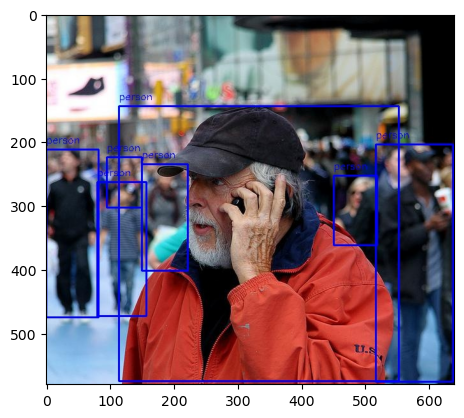

In [1]:
# Import the necessary library
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
import base64
# Set the URL for the Flask API endpoint.
# Update the URL if your API d hosted on a different host or port.
url = "http://127.0.0.1:5000/detection"

# Path to the image file you want to upload.
file_path = "./test_image/000000000395.jpg"  # Replace with your image path

# Open the file in binary mode and prepare the payload.
with open(file_path, "rb") as image_file:
    # 'files' will be sent as multipart form-data with key "image"
    files = {"image": image_file}
    
    # Send the POST request to the API endpoint
    response = requests.post(url, files=files)
    print(response.json())
    image_bytes = np.frombuffer(base64.b64decode(response.json()['visualize_image']), dtype=np.uint8)
    # Decode the image from the NumPy array.
    image_cv = cv2.imdecode(image_bytes, cv2.IMREAD_COLOR)
# Print the status code and JSON response from the API
image = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [49]:
import psycopg2
postgres_client = psycopg2.connect(
        database="postgres_database", host="localhost",
        user="postgres_user", password="postgres_password", port=5432)

cursor = postgres_client.cursor()
select_query = "SELECT * FROM file_visualization;"
cursor.execute(select_query)

# Fetch all rows
records = cursor.fetchall()

# Print results
for row in records:
    print(row)  # (id, filename, time, person_count)



(1, '000000000328.jpg', datetime.datetime(2025, 2, 22, 16, 58, 15, 554150), 3)


In [6]:
import mlflow
import torch
from ultralytics import YOLO

# Download the artifact (replace <RUN_ID> with the actual MLflow run ID)
downloaded_path = mlflow.artifacts.download_artifacts(
    run_id="b4c321d905e34674be1d96af8153c760",
    artifact_path="model_weights/yolov8n.pth"  # or "model_weights/yolov8n.pt" if you logged the full file
)

# Load the state dictionary from the downloaded file
state_dict = torch.load(downloaded_path)

# Instantiate the model architecture (ensure it matches the one used during training)
model = YOLO("yolov8n.pt")  # this loads the architecture; you may then override its weights

# Load the state dictionary into the model
model.model.load_state_dict(state_dict, strict=True)
print("Successfully loaded weights from MLflow artifact into the model.")


MlflowException: Run 'b4c321d905e34674be1d96af8153c760' not found